In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import math

In [2]:
#function for transmission in an all pass ring

def Tsymthru(wavelength, neff, abscoef_power, r, radius):
    phase=4*math.pi**2*radius*neff/wavelength
    round_trip_loss_field=np.exp(-(abscoef_power*2*math.pi*radius)/2)
    Numer=round_trip_loss_field**2-2*round_trip_loss_field*r*np.cos(phase)+r**2
    Denom=1-2*r*round_trip_loss_field*np.cos(phase)+(r*round_trip_loss_field)**2
    return Numer/Denom
def dB2Frac(dB):
    return 10**(dB/10)

In [4]:
#this is the transmission data that can be changed for every iteration

V_T= np.loadtxt("../4K-Transmission-Data/-2V-4K-Data.csv", delimiter=",")
x = V_T[:,0] 
y = V_T[:,1]

In [5]:
#check for an weird points

print(y)

[0.95047497 0.94660347 0.94043119 0.93401555 0.92723121 0.91882452
 0.91638111 0.90705264 0.89555612 0.88740259 0.87749808 0.85853971
 0.84552409 0.82605597 0.80304819 0.77716444 0.74486505 0.70592881
 0.6603557  0.6085882  0.55748438 0.5051638  0.45180029 0.40092823
 0.34576855 0.2897977  0.23423244 0.18272303 0.12779512 0.07106524
 0.02373337 0.00773116 0.0285709  0.08081958 0.13544331 0.19042916
 0.24356091 0.30115411 0.35469144 0.40620085 0.45875319 0.51428948
 0.56782682 0.62124248 0.67429311 0.72141481 0.76079352 0.79353536
 0.82030402 0.84242689 0.86794623 0.8848971  0.90122947 0.915189
 0.92520328 0.92900104]


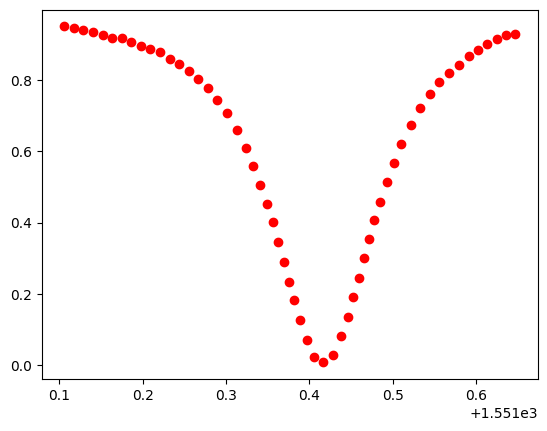

In [6]:
plt.plot(x, y, 'ro', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.show()

In [7]:
def Guess(wavelength,neff, abscoef_power):
    return Tsymthru(wavelength, neff, abscoef_power, 0.986, 10e-6)

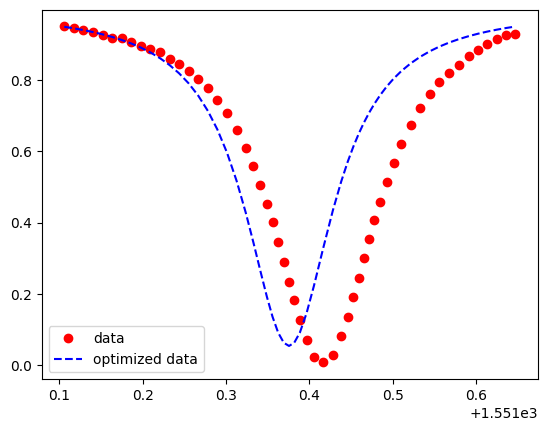

In [8]:
#plot a guess to make sure the neff value works
new_x = np.linspace(1540, 1560, 100)
ans = Guess(x*1e-9,2.1728, 280)

plt.plot(x, y, 'o', color ='red', label ="data")
plt.plot(x, ans, '--', color ='blue', label ="optimized data")
plt.legend()
plt.savefig("fitdata.png")
plt.show()

In [9]:
fit_params_arr=np.zeros([len(y)+1,2])
fit_params_arr[0]=[2.1728, 280]
for i in range(len(y)):
    fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x*1e-9,y,p0=fit_params_arr[i])
    fit_params_arr[i+1]=fit_params_arr[i]
fit_params_arr=fit_params_arr[:-1]

print(fit_params_arr)

[[  2.17285711 390.53673389]
 [  2.17285711 390.53738538]
 [  2.17285711 390.5373801 ]
 [  2.17285711 390.53735989]
 [  2.17285711 390.53735989]
 [  2.17285711 390.53735989]
 [  2.17285711 390.53735989]
 [  2.17285711 390.53735989]
 [  2.17285711 390.53735989]
 [  2.17285711 390.53735989]
 [  2.17285711 390.53735989]
 [  2.17285711 390.53735989]
 [  2.17285711 390.53735989]
 [  2.17285711 390.53735989]
 [  2.17285711 390.53735989]
 [  2.17285711 390.53735989]
 [  2.17285711 390.53735989]
 [  2.17285711 390.53735989]
 [  2.17285711 390.53735989]
 [  2.17285711 390.53735989]
 [  2.17285711 390.53735989]
 [  2.17285711 390.53735989]
 [  2.17285711 390.53735989]
 [  2.17285711 390.53735989]
 [  2.17285711 390.53735989]
 [  2.17285711 390.53735989]
 [  2.17285711 390.53735989]
 [  2.17285711 390.53735989]
 [  2.17285711 390.53735989]
 [  2.17285711 390.53735989]
 [  2.17285711 390.53735989]
 [  2.17285711 390.53735989]
 [  2.17285711 390.53735989]
 [  2.17285711 390.53735989]
 [  2.17285711

In [10]:
fit_ans = Guess(x*1e-9,fit_params_arr[:,0], fit_params_arr[:,1])

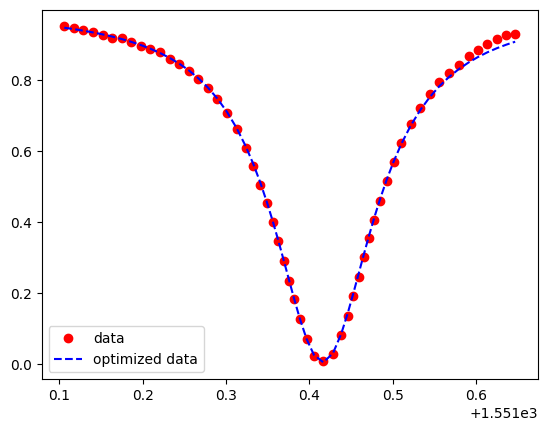

In [11]:
plt.plot(x, y, 'o', color ='red', label ="data")
plt.plot(x, fit_ans, '--', color ='blue', label ="optimized data")
plt.legend()
plt.savefig("fitdata.png")
plt.show()